In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initializing constant parameters 
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato/PlantVillage Dataset", 
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
# Classes of the types of data in our dataset
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch, label_batch in dataset.take(1):    
    print(image_batch.shape)
    print(label_batch.numpy())       

(32, 256, 256, 3)
[1 1 1 1 2 1 1 2 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

## Visualize some of the images from our dataset

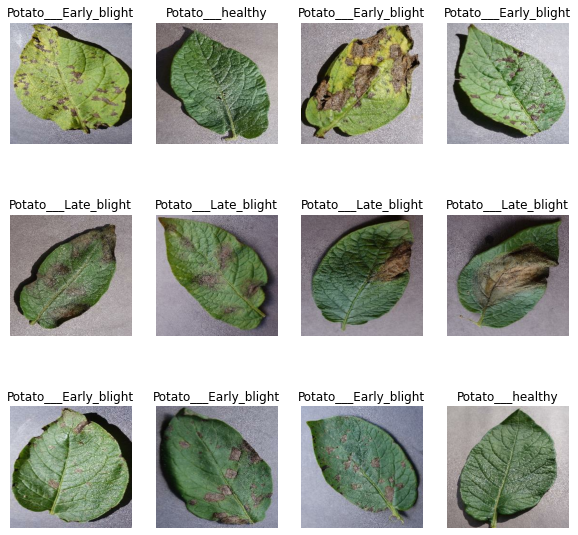

In [9]:
# As image value in float we convert it to int
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):     
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)*train_size  

54.400000000000006

In [12]:
# Train dataset 
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
# Test Dataset
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
# Validation Dataset
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
# 10% data for validation set
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
# 10% data for test set
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) 
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
# Preprocessing

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),  # Resizing while prediction might help if some image is not 256x256
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape= input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [22]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 183s 485ms/step - loss: 0.9216 - accuracy: 0.5064 - val_loss: 0.8742 - val_accuracy: 0.6927
Epoch 2/50
54/54 [==============================] - 7s 135ms/step - loss: 0.7123 - accuracy: 0.7078 - val_loss: 0.6603 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 7s 136ms/step - loss: 0.5111 - accuracy: 0.7818 - val_loss: 0.3828 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 7s 136ms/step - loss: 0.3554 - accuracy: 0.8663 - val_loss: 0.3229 - val_accuracy: 0.8646
Epoch 5/50
54/54 [==============================] - 7s 135ms/step - loss: 0.3044 - accuracy: 0.8825 - val_loss: 0.3141 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 7s 135ms/step - loss: 0.2329 - accuracy: 0.9086 - val_loss: 0.2181 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 7s 134ms/step - loss: 0.2359 - accuracy: 0.9010 - val_loss: 0.4136 - val_accuracy: 0.8073
Epoc

In [24]:
model.save('my_model.h5')

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 73ms/step - loss: 0.0371 - accuracy: 0.9871


In [26]:
history

In [27]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['accuracy']

[0.5063657164573669,
 0.7077546119689941,
 0.7818287014961243,
 0.8663194179534912,
 0.8825231194496155,
 0.9085648059844971,
 0.9010416865348816,
 0.9241898059844971,
 0.9311342835426331,
 0.9600694179534912,
 0.9629629850387573,
 0.9484953880310059,
 0.9560185074806213,
 0.9710648059844971,
 0.9635416865348816,
 0.9693287014961243,
 0.9751157164573669,
 0.9739583134651184,
 0.9768518805503845,
 0.9762731194496155,
 0.9745370149612427,
 0.9832175970077515,
 0.984375,
 0.9675925970077515,
 0.9554398059844971,
 0.9872685074806213,
 0.9756944179534912,
 0.9652777910232544,
 0.9878472089767456,
 0.9895833134651184,
 0.9774305820465088,
 0.9733796119689941,
 0.9872685074806213,
 0.9872685074806213,
 0.9930555820465088,
 0.9832175970077515,
 0.9791666865348816,
 0.9704861044883728,
 0.984375,
 0.9936342835426331,
 0.9924768805503845,
 0.9913194179534912,
 0.984375,
 0.9878472089767456,
 0.9791666865348816,
 0.9959490895271301,
 0.9959490895271301,
 0.9930555820465088,
 0.9924768805503845,
 

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

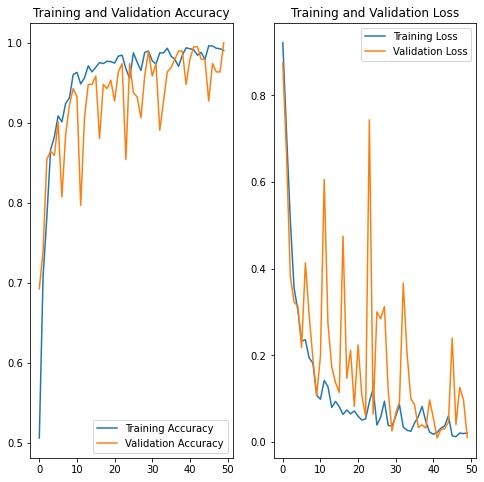

In [31]:
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label= 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label= 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First Image to predict: 
Actual label:  Potato___healthy
Predicted label:  Potato___healthy


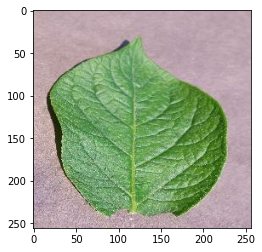

In [32]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First Image to predict: ")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

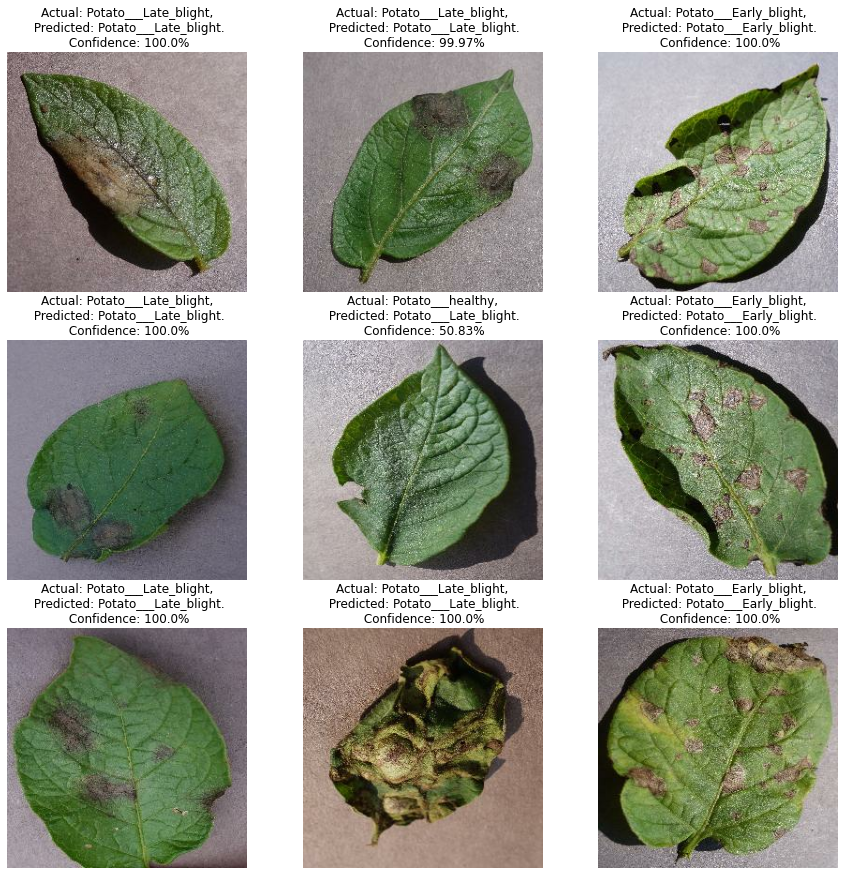

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [35]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [36]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_ds,verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_ds).shape)

8/8 - 1s - loss: 0.0371 - accuracy: 0.9871 - 643ms/epoch - 80ms/step
Restored model, accuracy: 98.71%
(232, 3)


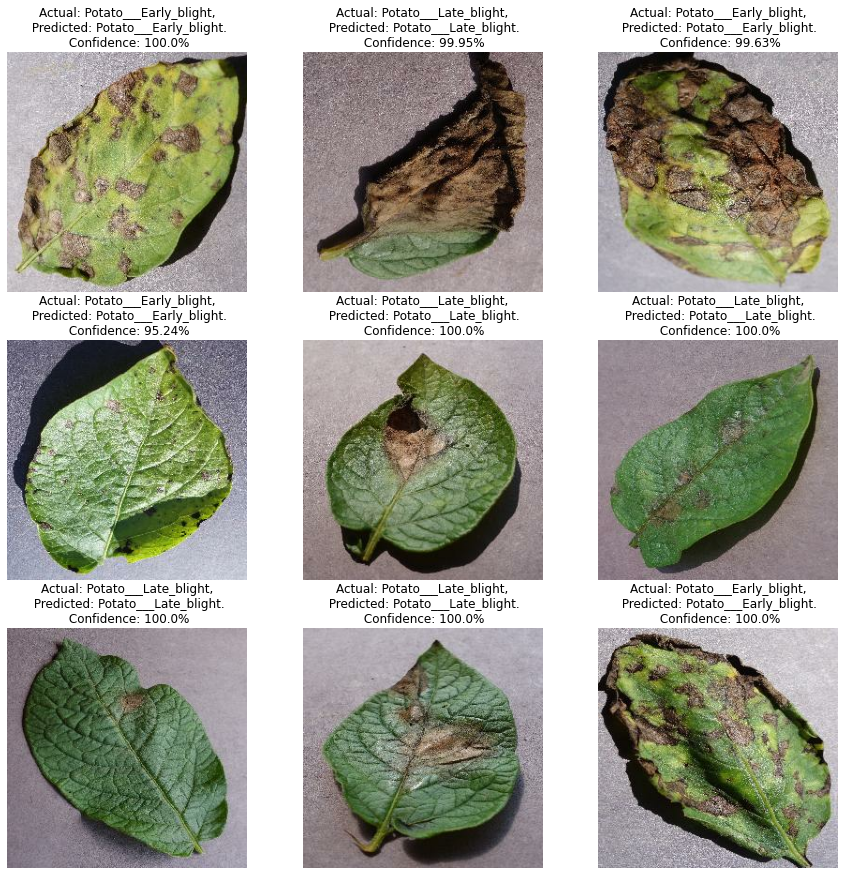

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
from sklearn.metrics import plot_confusion_matrix

In [45]:
import seaborn as sns

In [65]:
from keras.preprocessing.image import ImageDataGenerator

In [67]:
import numpy as numpy

In [94]:
img_width = 256
img_height = 256
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "/content/drive/MyDrive/dl_potato/test", # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 1369 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


In [95]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

In [96]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      1.00      1.00       649
 Potato___Late_blight       1.00      0.99      0.99       613
     Potato___healthy       0.97      0.98      0.98       107

             accuracy                           0.99      1369
            macro avg       0.99      0.99      0.99      1369
         weighted avg       0.99      0.99      0.99      1369



In [97]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [98]:
confusion_matrix

array([[649,   0,   0],
       [  3, 607,   3],
       [  0,   2, 105]])

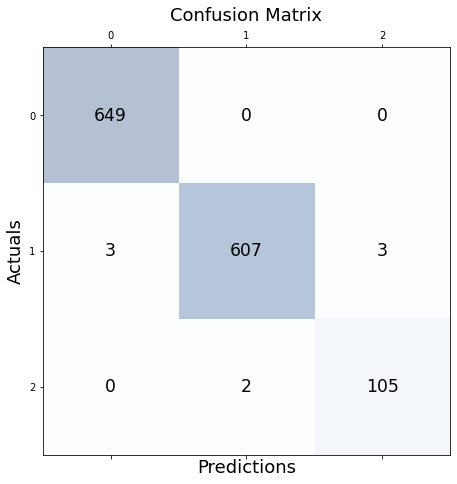

In [99]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()